In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
path= '/Users/Marcy_Student/Desktop/marcy/Modeling NYC-waste/Notebook/model_2_data.csv'
df = pd.read_csv(path)
df.head()


,month,borough,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,population_2010,refuse_lag12,high_recycling,recycling_ratio,refuse_lag1,paper_lag1,mgp_lag1
0,2022-01,Bronx,1,2992.7,214.5,135.6,91497,3518.18125,0,0.104733,2992.7,214.5,135.6
1,2022-01,Bronx,2,7412.7,217.1,207.1,52246,3518.18125,0,0.054129,7412.7,217.1,207.1
2,2022-01,Bronx,3,1984.9,122.1,155.3,79762,3518.18125,0,0.122619,1984.9,122.1,155.3
3,2022-01,Bronx,4,3688.2,275.0,341.8,146441,3518.18125,0,0.143275,3688.2,275.0,341.8
4,2022-01,Bronx,5,3166.8,223.1,330.2,128200,3518.18125,0,0.148733,3166.8,223.1,330.2


In [3]:
display(df.head())
df.columns

,month,borough,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,population_2010,refuse_lag12,high_recycling,recycling_ratio,refuse_lag1,paper_lag1,mgp_lag1
0,2022-01,Bronx,1,2992.7,214.5,135.6,91497,3518.18125,0,0.104733,2992.7,214.5,135.6
1,2022-01,Bronx,2,7412.7,217.1,207.1,52246,3518.18125,0,0.054129,7412.7,217.1,207.1
2,2022-01,Bronx,3,1984.9,122.1,155.3,79762,3518.18125,0,0.122619,1984.9,122.1,155.3
3,2022-01,Bronx,4,3688.2,275.0,341.8,146441,3518.18125,0,0.143275,3688.2,275.0,341.8
4,2022-01,Bronx,5,3166.8,223.1,330.2,128200,3518.18125,0,0.148733,3166.8,223.1,330.2


Index(['month', 'borough', 'communitydistrict', 'refusetonscollected',
       'papertonscollected', 'mgptonscollected', 'population_2010',
       'refuse_lag12', 'high_recycling', 'recycling_ratio', 'refuse_lag1',
       'paper_lag1', 'mgp_lag1'],
      dtype='object')

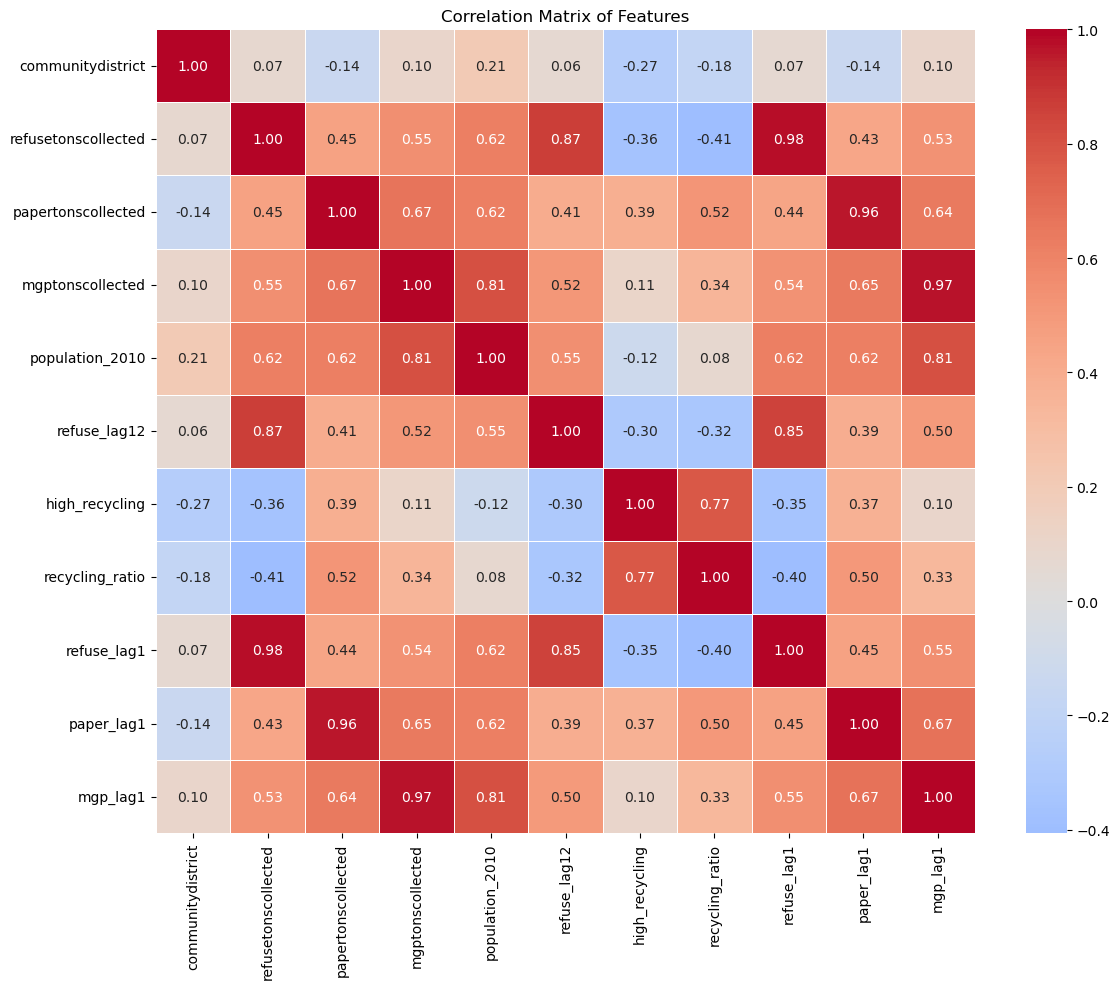

,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,population_2010,refuse_lag12,high_recycling,recycling_ratio,refuse_lag1,paper_lag1,mgp_lag1
communitydistrict,1.000000,0.072090,-0.137514,0.099073,0.205340,0.063512,-0.266679,-0.183898,0.071470,-0.137499,0.098127
refusetonscollected,0.072090,1.000000,0.453690,0.548129,0.618745,0.865268,-0.357337,-0.406004,0.976986,0.432745,0.527769
papertonscollected,-0.137514,0.453690,1.000000,0.670030,0.619651,0.405821,0.386430,0.519833,0.437647,0.957969,0.640755
mgptonscollected,0.099073,0.548129,0.670030,1.000000,0.807617,0.515052,0.108659,0.343146,0.535005,0.646429,0.971337
population_2010,0.205340,0.618745,0.619651,0.807617,1.000000,0.553931,-0.119554,0.076978,0.618130,0.620317,0.807346
refuse_lag12,0.063512,0.865268,0.405821,0.515052,0.553931,1.000000,-0.303235,-0.324038,0.852869,0.390433,0.499962
high_recycling,-0.266679,-0.357337,0.386430,0.108659,-0.119554,-0.303235,1.000000,0.774466,-0.354276,0.371546,0.097496
recycling_ratio,-0.183898,-0.406004,0.519833,0.343146,0.076978,-0.324038,0.774466,1.000000,-0.402290,0.503041,0.330167
refuse_lag1,0.071470,0.976986,0.437647,0.535005,0.618130,0.852869,-0.354276,-0.402290,1.000000,0.454043,0.547689
paper_lag1,-0.137499,0.432745,0.957969,0.646429,0.620317,0.390433,0.371546,0.503041,0.454043,1.000000,0.671261


In [4]:
# numerical cols
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Display correlation matrix
display(correlation_matrix)

In [5]:
df.columns

Index(['month', 'borough', 'communitydistrict', 'refusetonscollected',
       'papertonscollected', 'mgptonscollected', 'population_2010',
       'refuse_lag12', 'high_recycling', 'recycling_ratio', 'refuse_lag1',
       'paper_lag1', 'mgp_lag1'],
      dtype='object')

In [6]:
df.isna().sum()

month                  0
borough                0
communitydistrict      0
refusetonscollected    0
papertonscollected     0
mgptonscollected       0
population_2010        0
refuse_lag12           0
high_recycling         0
recycling_ratio        0
refuse_lag1            0
paper_lag1             0
mgp_lag1               0
dtype: int64

## building logistic regression models

In [9]:
# target selection
target = df['high_recycling']

# candidates features selection
candidates_features = ['month', 'borough', 'communitydistrict', 'refuse_lag1',
       'paper_lag1', 'mgp_lag1',
       'population_2010', 'refuse_lag12']

# Y and X MATRICES
y = target.astype('int')
X = df[candidates_features]

# Droping rows with any missing values and alligning my y
X = X.dropna()
y = y.loc[X.index]

# Fixing categorical columnns
X['month'] = X['month'].astype(str)  
X['borough'] = X['borough'].astype(str).str.strip().str.title()
X['communitydistrict'] = X['communitydistrict'].astype(str)

# Train_test split data using time aware method

## unique months and last 6 months for test set
unique_months = sorted(X['month'].unique())
test_months = unique_months[-6:]

# Create train/test split based on last 6 months
test_mask = X['month'].isin(test_months)
X_train = X[~test_mask]
X_test = X[test_mask]
y_train = y[~test_mask]
y_test = y[test_mask]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training months: {X_train['month'].min()} to {X_train['month'].max()}")
print(f"Test months: {X_test['month'].min()} to {X_test['month'].max()}")

Training set size: 2360
Test set size: 354
Training months: 2022-01 to 2025-04
Test months: 2025-05 to 2025-10


### 1- Baseline Model, With all available features

Accuracy: 0.944
F1-score: 0.891
ROC-AUC: 0.988
Confusion Matrix:
[[252  10]
 [ 10  82]]

Classification Report:
              precision    recall  f1-score   support

           0      0.962     0.962     0.962       262
           1      0.891     0.891     0.891        92

    accuracy                          0.944       354
   macro avg      0.927     0.927     0.927       354
weighted avg      0.944     0.944     0.944       354



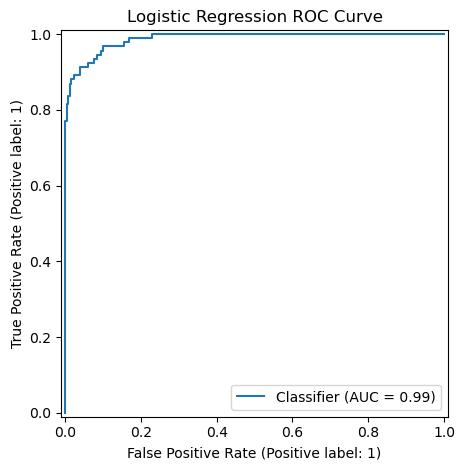

In [17]:
# categorical columns
categorical_cols = ['month', 'borough', 'communitydistrict']
# Numerical columms

numeric_cols = ['refuse_lag1',
       'paper_lag1', 'mgp_lag1', 'refuse_lag12'] 

# Preprocessing features
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
              ],
    remainder='drop'
)

# model logistic regression

logistic_regression =  LogisticRegression()

# building pipeline
classifier1 =  Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', logistic_regression)
])

# Train_test split data using time aware method

## unique months and last 6 months for test set
unique_months = sorted(X['month'].unique())
test_months = unique_months[-6:]

# fitting the model
classifier1.fit(X_train, y_train)

# pedictions
y_pred = classifier1.predict(X_test)
y_proba = classifier1.predict_proba(X_test)[:, 1]


# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc:.3f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('Logistic Regression ROC Curve')
plt.tight_layout()
plt.show()

### 2- Simple Model, minimal features, multicollinearity correction and update feature (refuse lag12)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['month', 'borough',
                                                   'communitydistrict']),
                                                 ('num', StandardScaler(),
                                                  ['refuse_lag1', 'paper_lag1',
                                                   'mgp_lag1',
                                                   'population_2010',
                                                   'refuse_lag12',
                                                   'population_2010'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

Accuracy: 0.927
F1-score: 0.870
ROC-AUC: 0.987
Confusion Matrix:
[[241  21]
 [  5  87]]

Classification Report:
              precision    recall  f1-score   support

           0      0.980     0.920     0.949       262
           1      0.806     0.946     0.870        92

    accuracy                          0.927       354
   macro avg      0.893     0.933     0.909       354
weighted avg      0.934     0.927     0.928       354



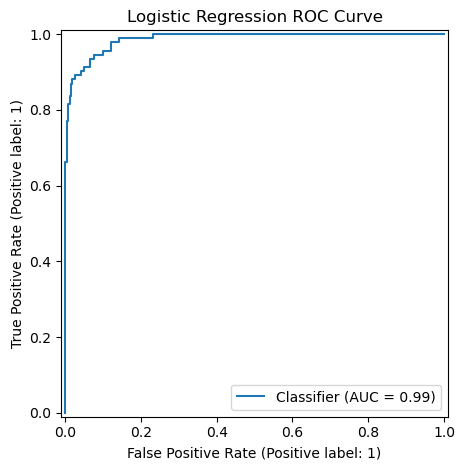

In [18]:
# categorical columns
#categorical_cols = ['month', 'borough', 'communitydistrict']

categorical_cols = ['month', 'borough','communitydistrict']


# Numerical columms
numeric_cols = ['refuse_lag1',
       'paper_lag1', 'mgp_lag1',
       'population_2010', 'refuse_lag12','population_2010']  # chose minimal columns and added refuse_lag12 IMPORTANT

# Preprocessing features
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
              ],
    remainder='drop'
)

# model logistic regression

logistic_regression =  LogisticRegression(
    penalty='l2', # for multicolinearity correction (Ridge), ## IMPORTANT
    C=1.0,
    class_weight='balanced',
    max_iter=1000
)

# building pipeline
classifier2 =  Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', logistic_regression)
])

display(classifier2)
# fitting the model
classifier2.fit(X_train, y_train)

# pedictions
y_pred = classifier2.predict(X_test)
y_proba = classifier2.predict_proba(X_test)[:, 1]


# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc:.3f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('Logistic Regression ROC Curve')
plt.tight_layout()
plt.show()

# Final tuned model, Chose appropriate threshold

Optimal threshold: 0.858
Precision at optimal threshold: 0.942
Recall at optimal threshold: 0.880
Accuracy: 0.932
F1-score: 0.878
ROC-AUC: 0.987
Confusion Matrix:
[[244  18]
 [  6  86]]

Classification Report:
              precision    recall  f1-score   support

           0      0.976     0.931     0.953       262
           1      0.827     0.935     0.878        92

    accuracy                          0.932       354
   macro avg      0.901     0.933     0.915       354
weighted avg      0.937     0.932     0.933       354



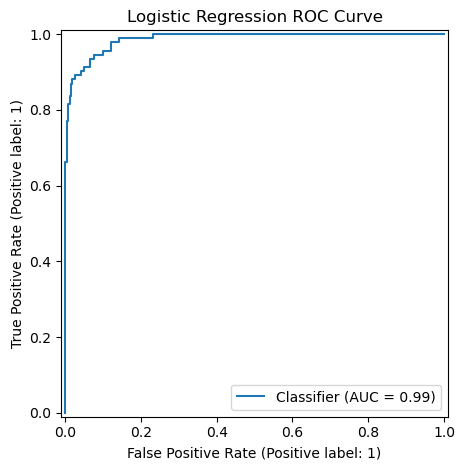

In [ ]:
# Finding optimal threshold:  this willmaximizing F1_score and account for business cost
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
optimal_idx = np.argmax(2 * precision * recall / (precision + recall))
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Precision at optimal threshold: {precision[optimal_idx]:.3f}")
print(f"Recall at optimal threshold: {recall[optimal_idx]:.3f}")

# adjusting previous predictions with new threshold
y_pred_adj = (y_proba > 0.60).astype(int)

# Calculate precision and recall at 0.60 threshold
from sklearn.metrics import precision_score, recall_score
precision_at_60 = precision_score(y_test, y_pred_adj)
recall_at_60 = recall_score(y_test, y_pred_adj)

print(f"\n--- Metrics at threshold 0.60 ---")
print(f"Precision at 0.60: {precision_at_60:.3f}")
print(f"Recall at 0.60: {recall_at_60:.3f}")

# Metrics
acc = accuracy_score(y_test, y_pred_adj)
f1 = f1_score(y_test, y_pred_adj)
roc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred_adj)

print(f"\nAccuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc:.3f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adj, digits=3))

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('Logistic Regression ROC Curve')
plt.tight_layout()
plt.show()

In [20]:
display(y_pred_adj)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Saving model and optimal threshold

In [21]:
import joblib

# Save the entire pipeline
joblib.dump(classifier2, 'recycling_performance.pkl')

# Save optimal threshold
import json
with open('model_config_2.json', 'w') as f:
    json.dump({'optimal_threshold': float(optimal_threshold)}, f)